# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [4]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [5]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

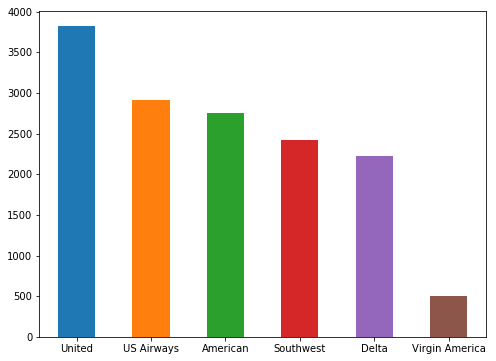

In [6]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

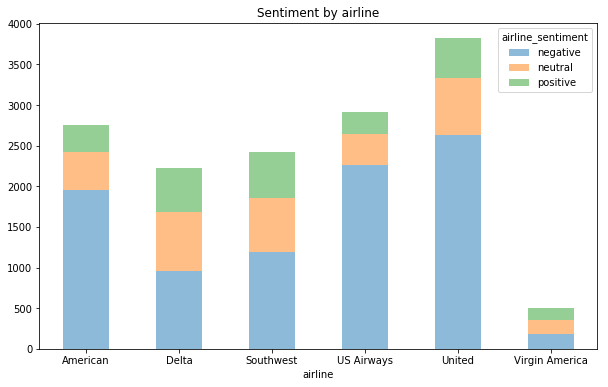

In [7]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
X.head()

tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [11]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [12]:
X_dtm.shape

(14640, 15051)

In [13]:
print(vect.get_feature_names()[-150:-100])

['yayayay', 'ybmbgs0dhn', 'ybv0xaowkv', 'yc7v2s0iod', 'yccitaep3s', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled', 'yelling', 'yellow', 'yeniettelswood', 'yep', 'yer', 'yes', 'yeseniahernandez', 'yessir', 'yest', 'yesterday', 'yet', 'yf9nhmwyff', 'yh1kzkyzrr', 'yhz', 'yi4wguk5tr', 'yield', 'yikes', 'yiwlhqhzgp', 'ymftw1uyhr', 'ymmh9k4cbr', 'ync2zut4zz', 'yo', 'yoga', 'yogurt', 'yokkhhqcmp', 'york', 'yorkshire2002', 'you', 'youareonyourown', 'youcandobetter', 'youcouldntmakethis', 'youd', 'youdidit', 'youknowyouwantto']


In [14]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 17964)

In [15]:
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 483199)

In [16]:
print(vect.get_feature_names()[-1000:-950])

['your tag line', 'your tag line fly', 'your team', 'your team about', 'your team about the', 'your team btw', 'your team btw notevenjv', 'your team couldn', 'your team couldn share', 'your team created', 'your team created your', 'your team failed', 'your team failed to', 'your team family', 'your team family emerg', 'your team for', 'your team for being', 'your team for dealing', 'your team from', 'your team from 1f', 'your team from the', 'your team has', 'your team has lost', 'your team help', 'your team help us', 'your team here', 'your team here working', 'your team let', 'your team let make', 'your team member', 'your team member at', 'your team needs', 'your team needs to', 'your team rebooked', 'your team rebooked my', 'your team so', 'your team so beautifully', 'your team thanks', 'your team thanks lot', 'your team told', 'your team told 120', 'your team was', 'your team was just', 'your team with', 'your team with challenging', 'your teams', 'your teams lack', 'your teams la

### According with the instruction, we use a RandomForest Classifier

In [17]:
rf= RandomForestClassifier()
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)


pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.710582
std       0.021411
min       0.677375
25%       0.703793
50%       0.710383
75%       0.719283
max       0.742486
dtype: float64

In [18]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe())

In [19]:
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  117630
count    10.000000
mean      0.712496
std       0.020501
min       0.679645
25%       0.698705
50%       0.721066
75%       0.723332
max       0.744536
dtype: float64


In [20]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  14770
count    10.000000
mean      0.691253
std       0.043957
min       0.616803
25%       0.672985
50%       0.694920
75%       0.710922
max       0.774590
dtype: float64


In [21]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  26089
count    10.000000
mean      0.700272
std       0.024031
min       0.656421
25%       0.688686
50%       0.705502
75%       0.710383
max       0.741120
dtype: float64


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [24]:
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

C:\Users\Edgardo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
X_dtm

<14640x15051 sparse matrix of type '<class 'numpy.int64'>'
	with 234281 stored elements in Compressed Sparse Row format>

In [26]:
Y=np_utils.to_categorical(y,3)

In [27]:
model = Sequential()

model.add(Dense(128, input_shape=(15051,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1926656   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,927,555
Trainable params: 1,927,299
Non-trainable params: 256
________________________________________________________________

In [28]:
op = RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

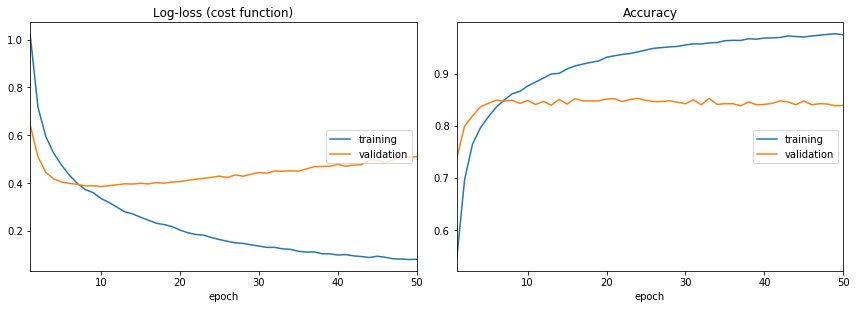

In [30]:
batch_size = 32
epochs = 50
history = model.fit(X_dtm,Y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

#### After calibrating the network in different iterations, with a learning rate of 0.0001 and defining a validation set of 10%, a test model performance higher than 80% was obtained.